# PI7 BD04 Data Science
### Max Smeets
### Dataset: Diamonds

## Inhoudsopgave
- [Inleiding](#inleiding)
  - [Opdrachtomschrijving](#opdrachtomschrijving)
  - [Randvoorwaarden](#randvoorwaarden)
- [Data selectie / preparatie](#data_selectie)
  - [Libraries / raw data](#raw_data)
  - [Exploratiefase](#exploratie)
  - [Outlier detectie](#outliers)
- [Multiple Linear Regression](#mlr)


<a id='inleiding'></a>
## Inleiding

<a id='opdrachtomschrijving'></a>
### Opdrachtomschrijving
Maak een groeirapport in drie fasen op de drie momenten die genoemd zijn in het
activiteitenrooster, dat je uiteindelijk in week 9 inlevert via Moodle. Het eindrapport wordt
uiteindelijk summatief beoordeeld.

Het doel is om in dit onderzoeksrapport te laten zien dat je in staat bent het Data Science proces te
doorlopen en de genoemde methoden toe te passen. Er zijn 2 feedbackmomenten, na fase 1 en 2,
op basis van hetgeen dan wordt opgeleverd. Deze feedback kan gebruikt worden om het gehele
rapport te verbeteren.

Om het rapport op te stellen kies je een dataset. In het rapport beschrijf je onderstaande methoden
in je eigen woorden en je voegt per methode een of meer voorbeelden toe die zijn uitgewerkt met
Python. Bij elk voorbeeld is het belangrijk aan te geven wat het doel is en het model uiteindelijk te
evalueren en te vergelijken.

*Fase 1:*
- Multiple linear regression
- Logistic regression

*Fase 2:*
- Decistion trees
- Random forests

*Fase 3 :*
- Neurale netwerken
- Support vector machines



<a id='randvoorwaarden'></a>
### Randvoorwaarden
Voorafgaand zijn binnen de module enkele randvoorwaarden aan het op te leveren onderzoek vastgesteld, deze zijn als volgt:

**Notebook/eindverslag:**
- Er wordt gebruik gemaakt van SciKit-Learn.
- Wordt aangeboden als Jupyter Notebook.
- Bestaat uit drie hoofdcomponenten:
  - Data selectie / preparatie.
  - Uitwerkingen van bonvenstaande methoden (fase 1 t/m 3).
  - Eindconclusie / evaluatie.

**Dataset:**
- Bevat minstens één feature geschikt voor classification.
- Bevat minstens één feature geschikt voor regression.
- Bevat voldoende features (+- 8 zonder labels).
- Bevat voldoende records (minimaal 50).
- Voorkeur naar verschillende typen data.

**Behandelde methoden:**
- Bevat een uitleg met voorbeeld en tenminste aandachtpunten voor de
evaluatie en kenmerkende eigenschappen met consequenties voor data preparatie.
- Bevat per stap van datapreparatie/selectie en/of aanpassing van parameter
aangeven welk effect geconstateerd is, welke conclusie voor vervolgstap getrokken
moet worden.
- Bevat argumentatie waarom beste model, het beste model is en aantonen dat deze
conclusie via een juiste evaluatie genomen is

**Eindevaluatie:**
- Vergelijking van evaluaties voor regression en classification apart, met argumentatie
van beste model
- Vergelijking van methoden regression/classification in relatie tot gekozen
doelstelling
- Beste modellen beoordelen op eindprestatie via test set en consequentie daarvan
voor gekozen doelstelling



<a id='data_selectie'></a>
## Data selectie / preparatie

<a id='raw_data'></a>
### Libraries / raw data

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('./diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


De "Unnamed: 0" kolom  representeert de index van een specifieke diamant, echter worden de indexes automatisch gegereerd.
Om onnodige dubbele entries te voorkomen wordt deze kolom dus verwijderd.

In [3]:
df = df.drop(axis=1, columns=['Unnamed: 0'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<a id='exploratie'></a>
### Exploratiefase

Vervolgens wordt gekeken naar een aantal generieke inzichten in de dataset.
Ten eerste geeft de df.info() functie weer dat de dataset 3 kolommen van datatype object bevatten, dit wordt gezien als categorische waardes. Daarnaast bevat de set nog 7 kolommen van het datatype int64 of float64, dit betreft de numerieke waardes binnen de dataset. Verder is duidelijk dat het om 53940 entries gaat binnen de set. Dit bewijst al dat de dataset voldoet aan de randvoorwaarden betreffende de gewenste kolom en rijgrootte.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# Calculate percentage missing values for each column
df.isna().mean() * 100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Nadat we weten dat er geen ontbrekende waardes in de dataset zitten kan een overzicht van de centrummaten gegenereerd worden in een apart dataframe.

In [7]:
described_df = df.describe()
described_df

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='outliers'></a>
### Outlier detectie
In eerste oogopzicht lijken de maximale waardes enorme outliers te zijn in vergelijking tot de 75% values.
Procentueel schieten de maximale waardes t.o.v. de 75% waarde er als volgt bovenuit:

In [8]:
columns = described_df.columns
j = 0
for i in described_df:
    percent = described_df[i]['max'] / described_df[i]['75%'] * 100
    print('{}: {}%'.format(columns[j], round(percent,2)))
    j+=1

carat: 481.73%
depth: 126.4%
table: 161.02%
price: 353.53%
x: 164.22%
y: 900.61%
z: 787.13%


Dit is in de volgende visualisatie duidelijk zichtbaar:

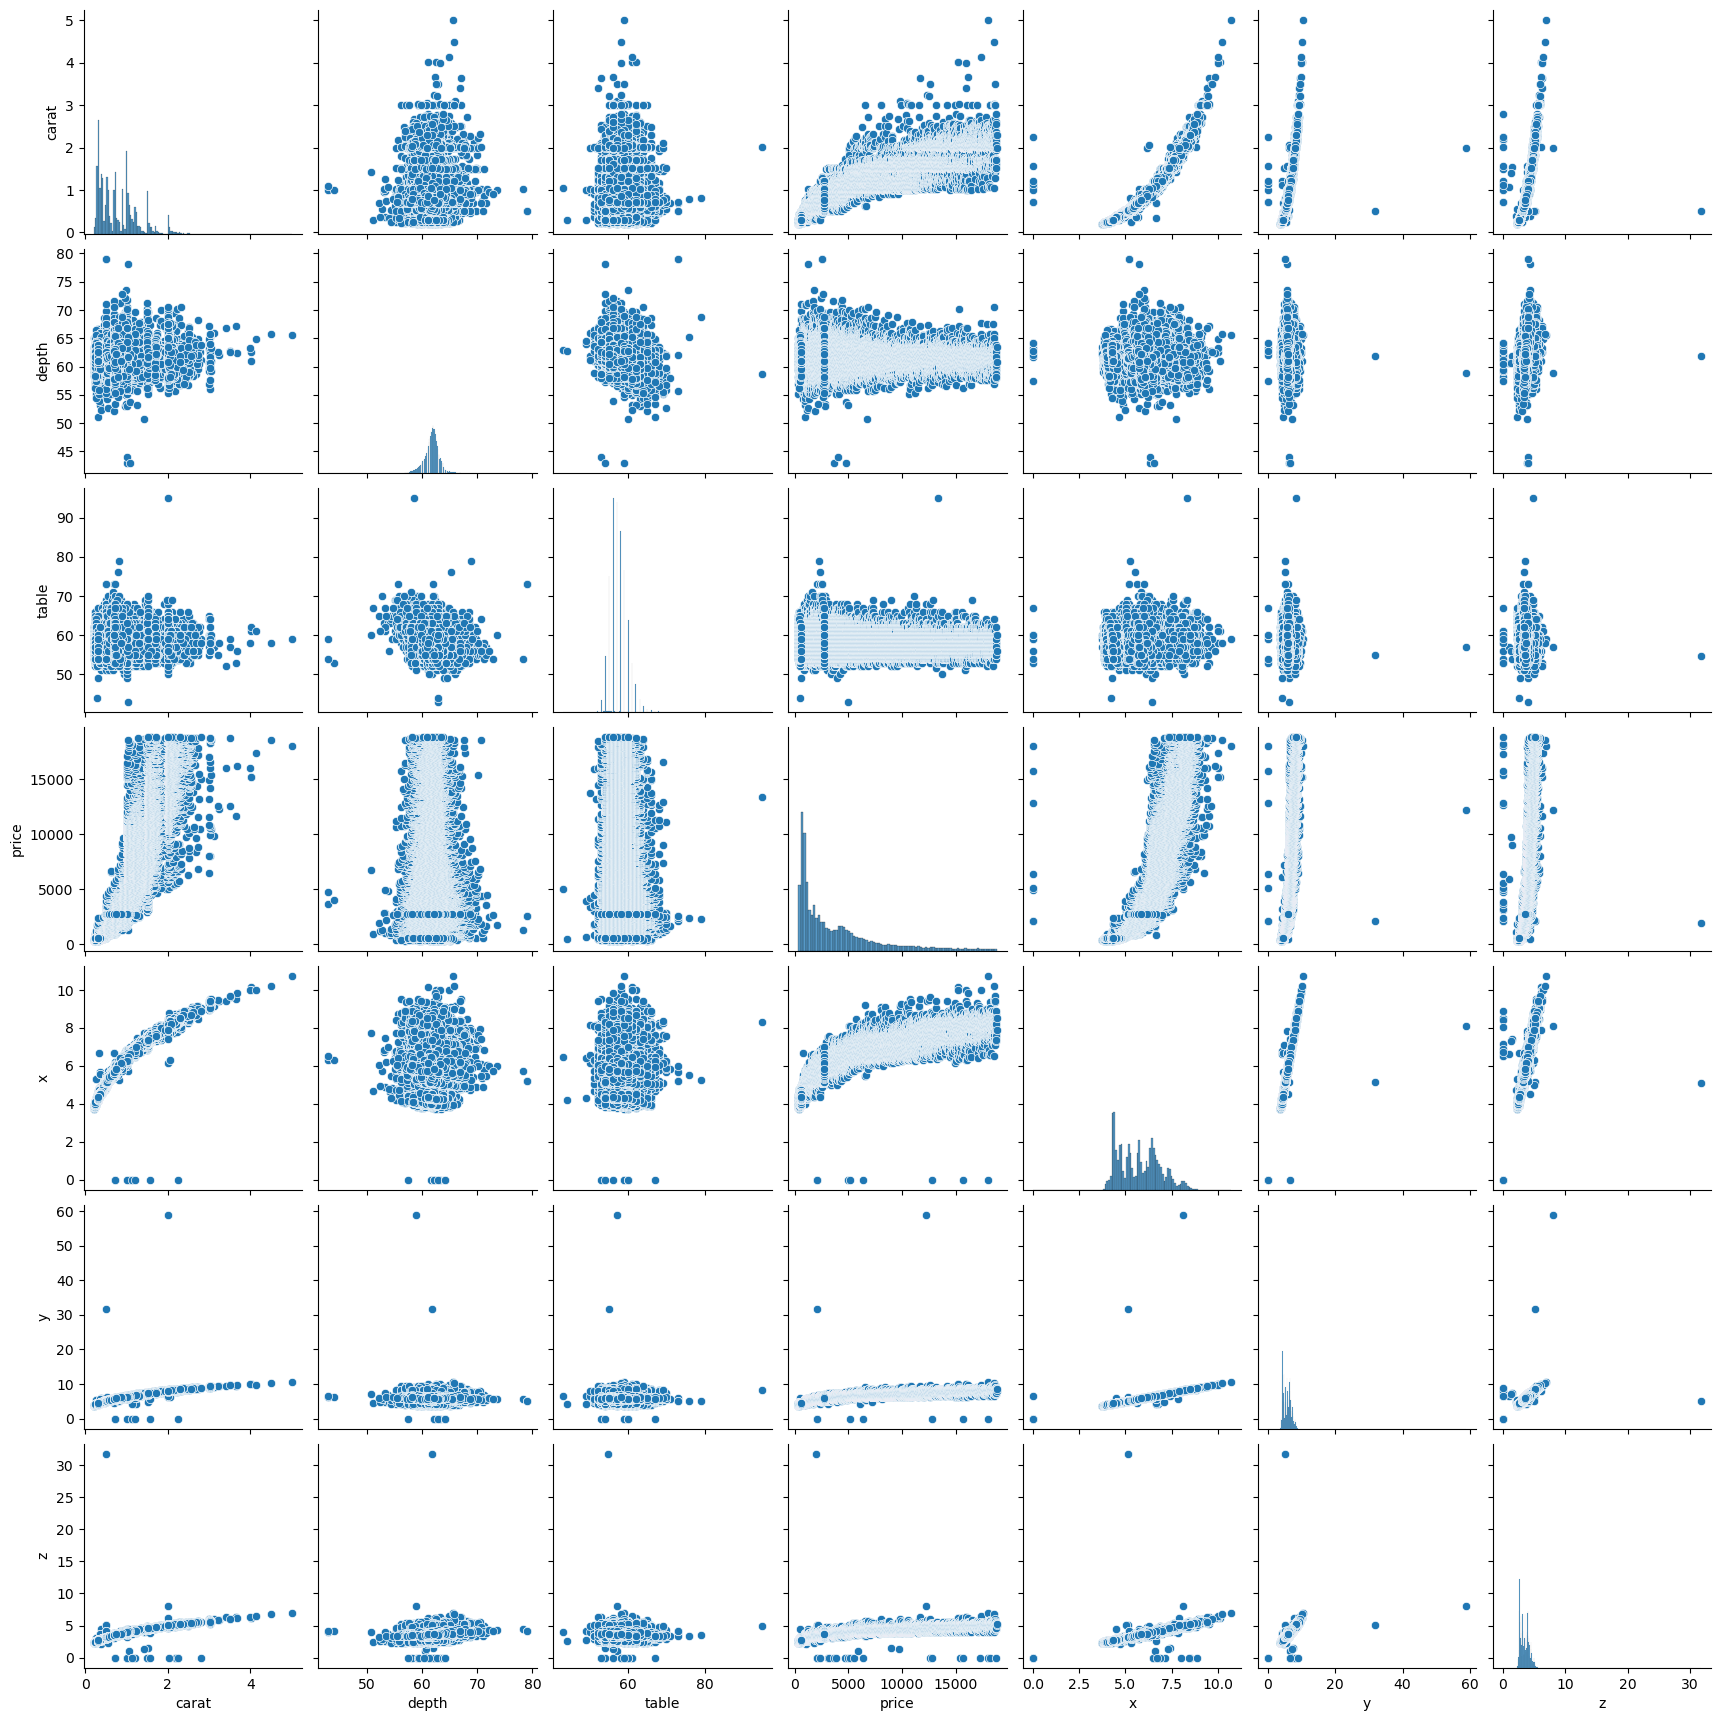

In [9]:
sns.pairplot(df)

Ten eerste bevatten de x, y en z features 0 waardes. Praktisch gezien is dit onmogelijk omdat een diamant een 3-dimensionaal object is dat ten alle tijden, in alle dimensies, een afmeting hoger dan 0 bevatten.

In [10]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

Vervolgens wordt gekeken naar de upper bound outliers, deze zijn per numerieke feature als volgt (indien van toepassing):
- x > 30
- y > 30
- z > 30
- depth > 75
- table > 80

In [11]:
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)]
df = df[(df["depth"]<75)]
df = df[(df["table"]<80)]

Met het verwijderen van de outliers resulteert dit in de volgende pairplot:

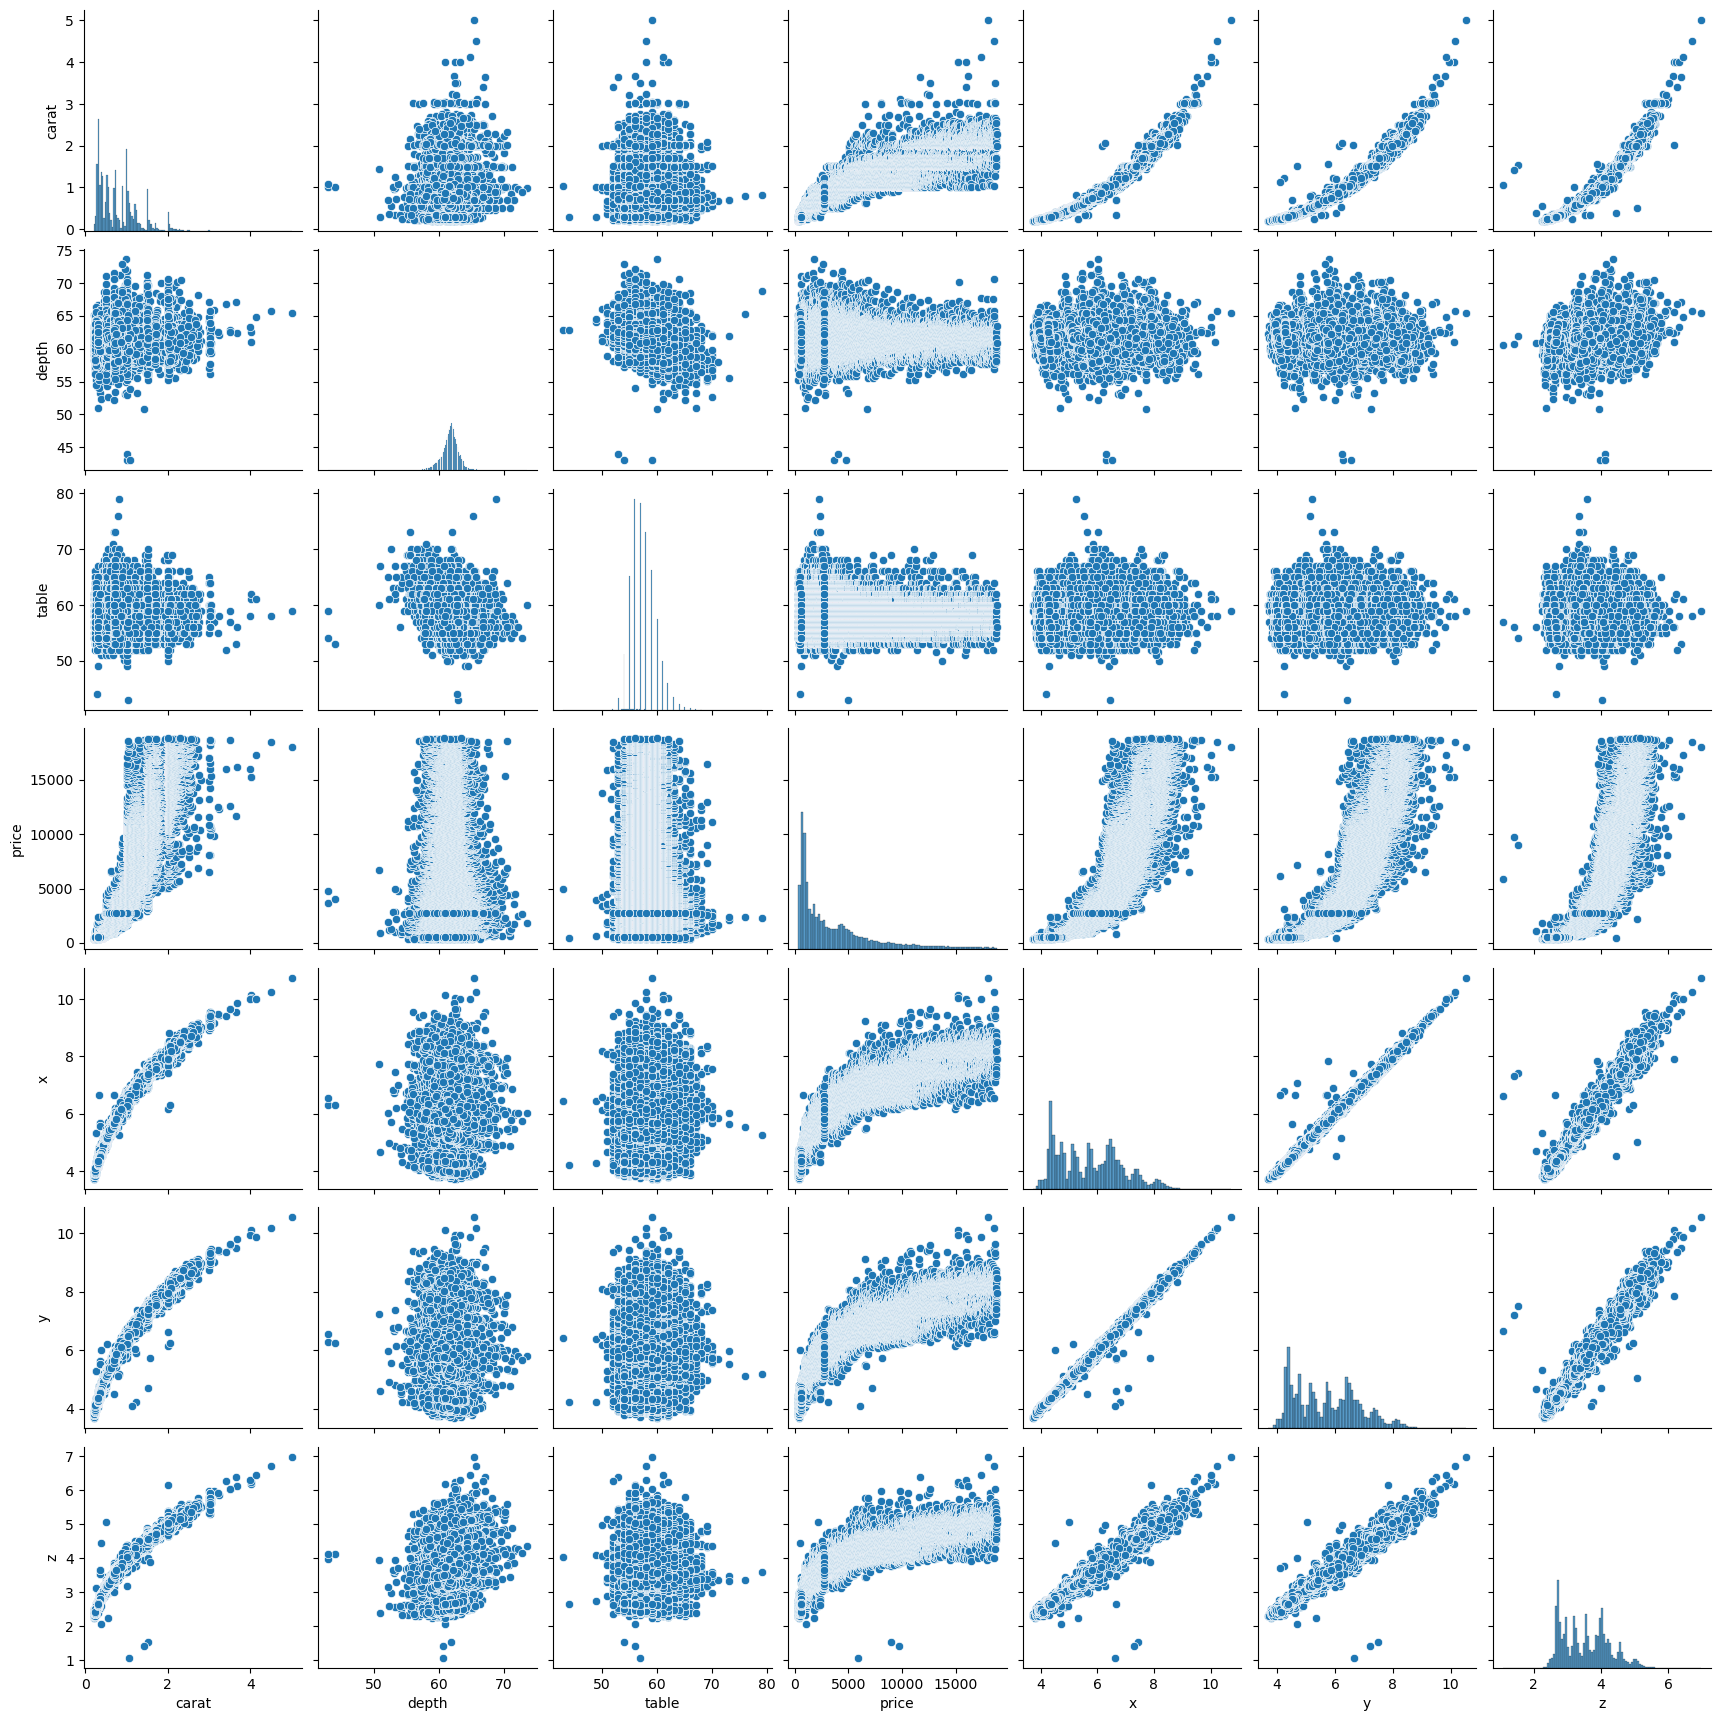

In [12]:
sns.pairplot(df)

Dit concludeert het prepareren van de dataset. Met behulp van deze opgeschoonde set kunnen de diverse modellen en technieken toegepast worden.

<a id='mlr'></a>

## Multiple Linear regression

Met behulp van een MLR model willen we een algoritme implementeren dat de prijs van een diamant kan voorspellen op basis van bepaalde features. Om dit zo accuraat mogelijk te kunnen doen is het van belang om te kijken naar hoe de verschillende features gecorreleerd zijn. Hiervoor kan de bovenstaande pairplot vervangen worden door een heatmap.


<AxesSubplot:>

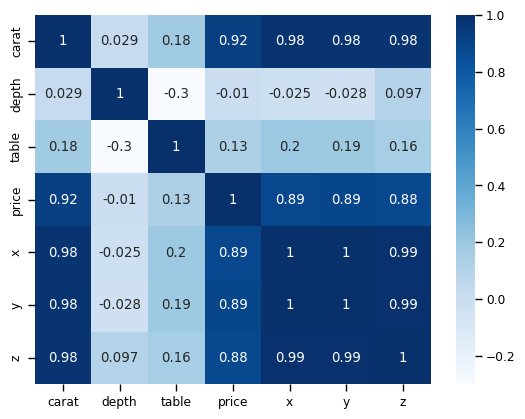

In [30]:
df_correlations = df.corr(numeric_only=True)
sns.heatmap(df_correlations, annot=True, cmap='Blues')

Bovenstaande heatmat bevat slechts de correlatie tussen de numerieke features. Om te weten welke features het meest geschikt zijn voor het maken van prijsvoorspellingen, dienen de niet-numerieke waardes geconverteerd te worden naar numerieke waardes.

In [31]:
non_num_cols = df.dtypes[df.dtypes == 'object'].index
encoder = OrdinalEncoder()
df[non_num_cols] = encoder.fit_transform(df[non_num_cols])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
scaler = MinMaxScaler()
df[['carat',"cut","color","clarity", 'depth', 'table', 'x', 'y', 'z',
'price']] = scaler.fit_transform(df[['carat',"cut","color","clarity", 'depth',
'table', 'x', 'y', 'z', 'price']])

<AxesSubplot:>

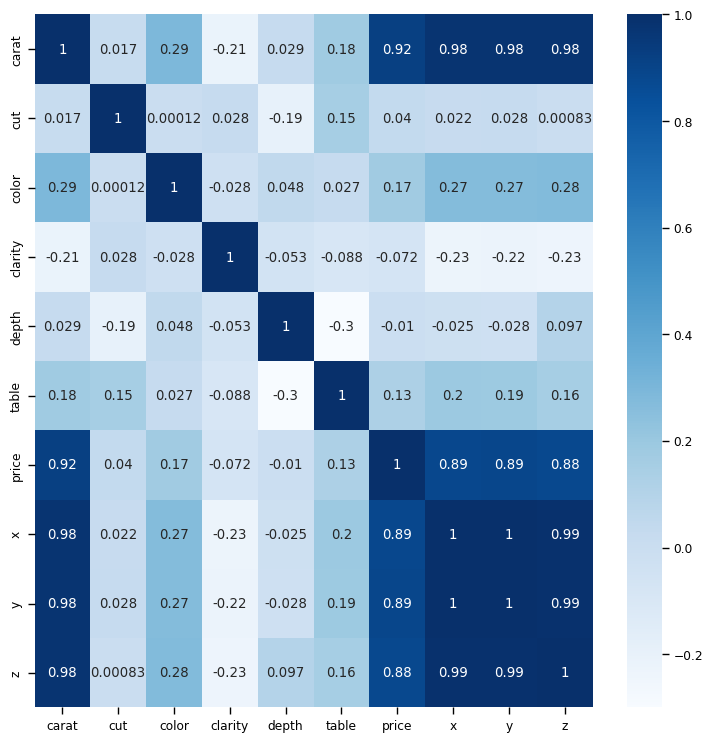

In [36]:
plt.figure(figsize=(9,9))
df_correlations = df.corr(numeric_only=True)
sns.heatmap(df_correlations, annot=True, cmap='Blues')


In [49]:
features = df.loc[:, df.columns != 'price']
target = df['price']
features.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,0.006237,0.50,0.166667,0.428571,0.604575,0.333333,0.031384,0.043732,0.230118
1,0.002079,0.75,0.166667,0.285714,0.549020,0.500000,0.022825,0.023324,0.209814
2,0.006237,0.25,0.166667,0.571429,0.454248,0.611111,0.045649,0.056851,0.209814
3,0.018711,0.75,0.833333,0.714286,0.633987,0.416667,0.067047,0.080175,0.263959
4,0.022869,0.25,1.000000,0.428571,0.663399,0.416667,0.087019,0.097668,0.284264


In [42]:
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.8)


In [43]:
##Inladen LR
model = LinearRegression()
model.fit(features_train, target_train)
##Target_pred variabele maken
target_pred = model.predict(features_test)
target_pred

array([ 0.29443829, -0.00926101,  0.22409322, ...,  0.07998065,
        0.16345757, -0.00889112])

In [53]:
##Mean Squared Error
print('MSE:', mean_squared_error(target_test, target_pred))
##Root Mean Squared Error
print('RMSE:', mean_squared_error(target_test, target_pred, squared = False))
##R2 Score
print("R2:", r2_score(target_test, target_pred))

MSE: 0.0055190212483115005
RMSE: 0.07429011541457922
R2: 0.8790765593640544


In [45]:
##Bekijken of de training overfitted is, indien we een hoge R2 score krijgen.
target_train_pred = model.predict(features_train)
r2_score(target_train, target_train_pred)

0.8884675889139225

In [46]:
##Adjusted R2 score
r2 = r2_score(target_test, target_pred)
n = len(target_test)
k = len(features_test.columns)
#Uitrekenen Adj R2
adj_r2_score = 1-(((1-r2)*(n-1))/(n-k-1))
adj_r2_score

0.8789755372749684

ValueError: not enough values to unpack (expected 2, got 1)

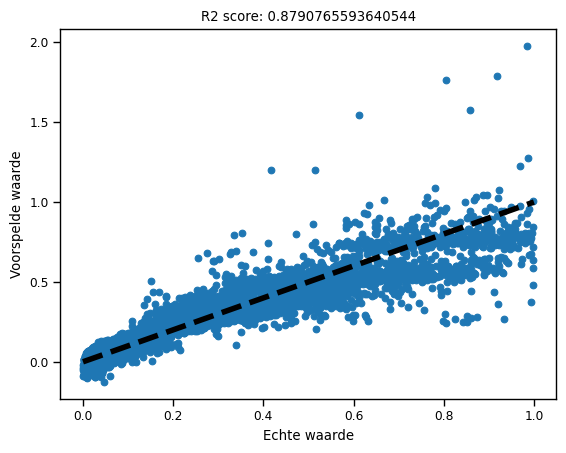

In [52]:
##Maken van scatterplot R2 Actual vs Predicted
fig, ax = plt.subplots()
ax.scatter(target_test, target_pred)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--',
lw=4)
ax.set_xlabel('Echte waarde')
ax.set_ylabel('Voorspelde waarde')
ax.set_title('R2 score: ' + str(r2_score(target_test, target_pred)))
#regression line
target_test, target_pred = target_test.values.reshape(-1,1),
target_pred.values.reshape(-1,1)
ax.plot(target_test, LinearRegression().fit(target_test,
target_pred).predict(target_test))
plt.show()